# Binary Classification

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [49]:
n_samples = 1000
X_data, y_data = make_circles(n_samples,
                              noise = 0.01,
                              random_state = 42)
len(X_data), len(y_data), X_data.shape, y_data.shape

(1000, 1000, (1000, 2), (1000,))

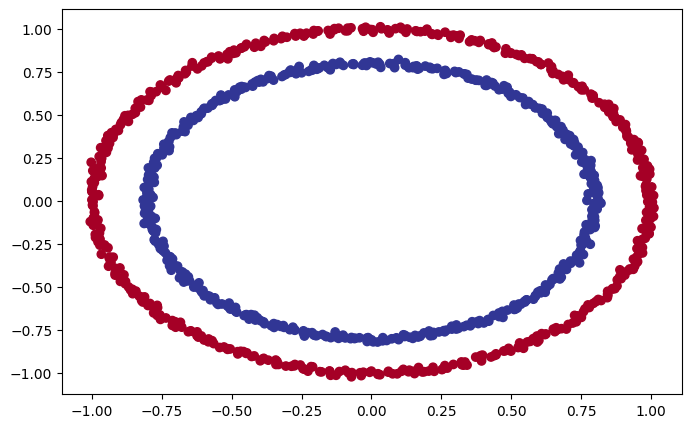

In [50]:
plt.figure(figsize=(8, 5))
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.RdYlBu)
plt.show()

In [51]:
from re import X
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [52]:
# Set the random seed
tf.random.set_seed(42)

# Create a model by using Sequential API
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Get the summary of the model
model_0.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model
model_0.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [54]:
# Fit the model
history_1 = model_0.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4950 - loss: 0.6910
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 0.6864 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5028 - loss: 0.6835 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - loss: 0.6803 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 0.6766  
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5739 - loss: 0.6724 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.6671
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6657 - loss: 0.6605 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.6518 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7622 - loss: 0.6415 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.6293  
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

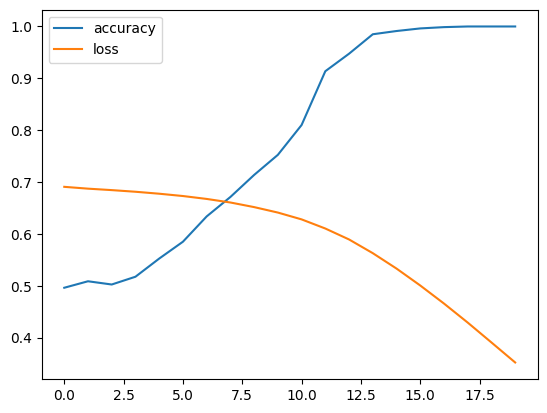

In [55]:
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.show()

In [56]:
model_0.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3481  


[0.3518141806125641, 1.0]

In [57]:
# Let's make some predictions
y_preds = model_0.predict(X_test)
y_preds[:4], y_test[:4]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


(array([[0.75064087],
        [0.29502967],
        [0.7183851 ],
        [0.28954893]], dtype=float32),
 array([1, 0, 1, 0]))

In [58]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


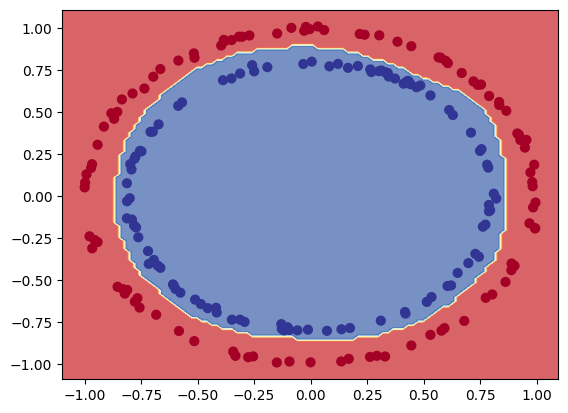

In [59]:
plot_decision_boundary(model_0, X_test, y_test)

In [60]:
# Generate predictions
y_preds_prob = model_0.predict(X_test)  # This outputs probabilities/logits

# For binary classification, round predictions
y_preds = tf.round(y_preds_prob)

# For multi-class classification (comment out one based on your model):
# y_preds = np.argmax(y_preds_prob, axis=1)

# Check for wrong predictions
wrong = []
for i in range(len(y_preds)):
    if y_preds[i] != y_test[i]:  # Ensure `y_test` matches format (binary or class index)
        wrong.append(i)

print(f"Number of wrong predictions: {len(wrong)}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Number of wrong predictions: 0


# Multi Class Classification

In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

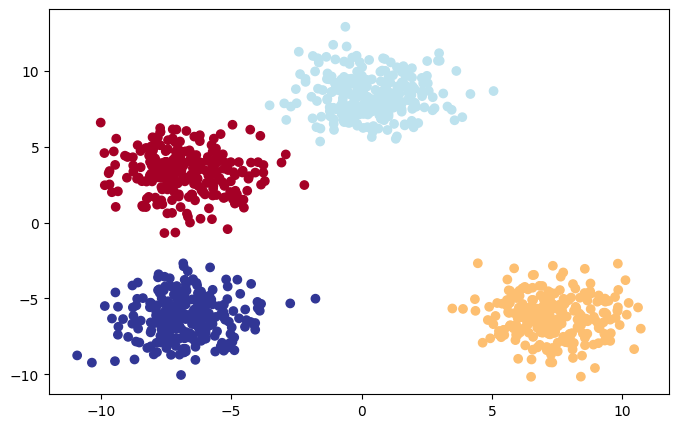

In [63]:
n_samples = 1000
X_data, y_data = make_blobs(n_samples = n_samples,
                            n_features = 2,
                            cluster_std = 1.4,
                            centers = 4)
plt.figure(figsize=(8, 5))
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.RdYlBu)
plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [65]:
# Set the random seed
tf.random.set_seed(42)

# Create a model by using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="softmax")
])

In [66]:
# Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [67]:
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2631 - loss: 1.6317 
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9623 - loss: 0.5156 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9958 - loss: 0.2000 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0986 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0593 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0398 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0289  
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0223 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0179
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0147 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0124 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

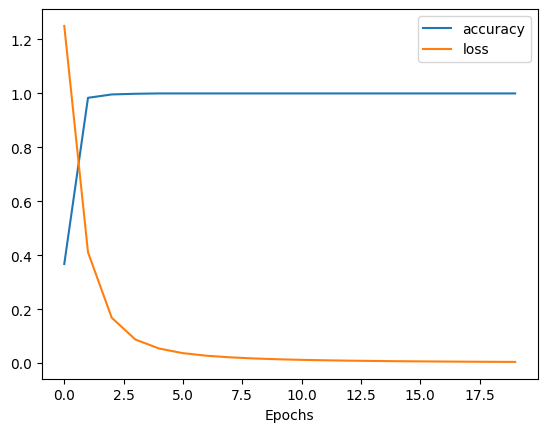

In [70]:
pd.DataFrame(history_1.history).plot()
plt.xlabel("Epochs")
plt.show()

In [71]:
y_preds = model_1.predict(X_test)
y_preds[:4]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[9.9579263e-01, 6.9509704e-05, 3.8288496e-03, 3.0900582e-04],
       [4.5643730e-05, 1.6827169e-05, 5.5817083e-07, 9.9993688e-01],
       [8.6552092e-07, 9.9652129e-01, 2.6770688e-03, 8.0082659e-04],
       [4.4735895e-09, 9.9977303e-01, 1.7432924e-04, 5.2522093e-05]],
      dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing multiclass classification...


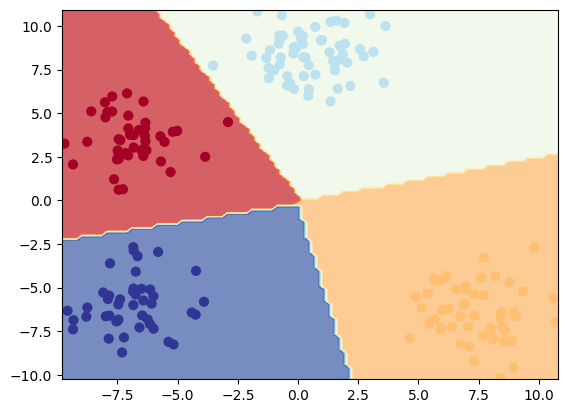

In [72]:
plot_decision_boundary(model_1, X_test, y_test)